# Travail 4

In [135]:
from scipy.io import arff
import pandas as pd
import numpy as np

from eval_method import eval_method

Le travail de prétraitement des données a été fait avec WEKA.

### Régression logisitique

In [136]:
file = "datasets/spambase_binary_fold1.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data_train = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
X_train, y_train = data_train.iloc[:, :-1], data_train.iloc[:, -1]
data_train.head()

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
2,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1


In [137]:
file = "datasets/spambase_binary_fold2-10.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])
data_test = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
X_test, y_test = data_test.iloc[:, :-1], data_test.iloc[:, -1]
data_test.head()

,word_freq_make_binarized,word_freq_address_binarized,word_freq_all_binarized,word_freq_3d_binarized,word_freq_our_binarized,word_freq_over_binarized,word_freq_remove_binarized,word_freq_internet_binarized,word_freq_order_binarized,word_freq_mail_binarized,...,word_freq_edu_binarized,word_freq_table_binarized,word_freq_conference_binarized,char_freq_;_binarized,char_freq_(_binarized,char_freq_[_binarized,char_freq_!_binarized,char_freq_$_binarized,char_freq_#_binarized,is_spam
0,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,1,1,1,1
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,1,0,0,1,1,...,0,0,0,1,1,0,1,1,0,1


In [138]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

y_pred = np.array(y_pred, dtype=int)
y_test_int = np.array(y_test, dtype=int)
eval_regression = eval_method(y_test_int, y_pred)

Accuracy :  0.9258454106280193
ROC AUC Score :  0.918694885361552
Precision :  0.9216441875401413
Recall :  0.8858024691358025
F1 Score :  0.9033679571923198
Kappa :  0.8432456432456432
Confusion Matrix :
 [[2398  122]
 [ 185 1435]]


On peut avoir les coefficients de la regression logistique : 

In [139]:
lr.coef_

array([[-0.30464621, -0.01963718, -0.08900541,  1.22247213,  1.24416025,
         0.41017257,  1.71380476,  0.35134438,  0.57935253,  0.58116342,
         0.44031638, -0.42747377, -0.45115342,  0.10946361,  0.55921891,
         1.42284319,  0.08553874,  0.34132714, -0.10155628,  0.75954835,
         0.80428241,  0.76655918,  0.87302786,  0.95733955, -1.89079051,
        -1.19282965, -1.51944811,  0.54929178, -0.34068445, -0.27989059,
        -0.54005364, -0.13696224,  0.59131438,  0.08840987, -0.93407508,
         0.98019937, -0.84416893,  0.0772959 , -0.27864779, -0.13404385,
        -0.64275931, -1.75651628, -0.30871935, -1.00771566, -0.8074332 ,
        -0.97143958, -0.51550236, -0.8356987 , -0.84566742, -0.32323481,
         0.23420415,  1.12937311,  1.44534343, -0.9549474 ]])

On a les coefficients que pour une seule classe. A partir de la documentation, les coefficients pour l'autre classe dans une classification binnaire sont -lr.coef_
https://scikit-learn.org/1.5/modules/linear_model.html#logistic-regression

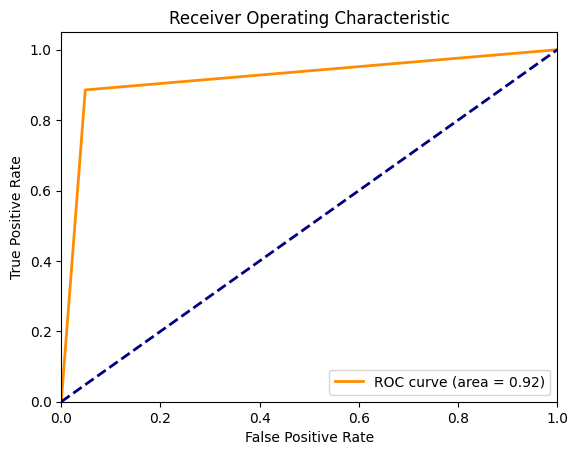

In [140]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for the logistic regression model
fpr, tpr, _ = roc_curve(y_test_int, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [141]:
regression_coef = {col: float(coef) for col, coef in zip(data.columns[:-1], lr.coef_[0])}

print("word_freq_hp_binarized :", regression_coef["word_freq_hp_binarized"])
print("char_freq_$_binarized :", regression_coef["char_freq_$_binarized"])

word_freq_hp_binarized : -1.8907905051776182
char_freq_$_binarized : 1.4453434311006104


Comme dans la regression logistique on utilise une fonction sigmoïde, un coefficient élevé augmentera la probabilité qu'un élement soit considéré comme un spam s'il le possède. Ainsi, "$" est un marqueur de spam alors "hp" est un marqueur de non-spam.

In [142]:
sorted_regression_coef = dict(sorted(regression_coef.items(), key=lambda item: item[1], reverse=True))
sorted_regression_coef

{'word_freq_remove_binarized': 1.7138047606382425,
 'char_freq_$_binarized': 1.4453434311006104,
 'word_freq_free_binarized': 1.422843192492773,
 'word_freq_our_binarized': 1.2441602450093752,
 'word_freq_3d_binarized': 1.2224721293046072,
 'char_freq_!_binarized': 1.1293731098478161,
 'word_freq_technology_binarized': 0.9801993739920836,
 'word_freq_money_binarized': 0.9573395519817636,
 'word_freq_000_binarized': 0.8730278562827025,
 'word_freq_your_binarized': 0.804282412764142,
 'word_freq_font_binarized': 0.766559178106422,
 'word_freq_credit_binarized': 0.7595483515607389,
 'word_freq_data_binarized': 0.5913143845292758,
 'word_freq_mail_binarized': 0.5811634179949766,
 'word_freq_order_binarized': 0.5793525290513873,
 'word_freq_addresses_binarized': 0.5592189116489933,
 'word_freq_650_binarized': 0.5492917820900854,
 'word_freq_receive_binarized': 0.4403163837280162,
 'word_freq_over_binarized': 0.4101725716748735,
 'word_freq_internet_binarized': 0.35134438114392524,
 'word_fr

Des attributs à valeur réelles ne changent rien pour une regression logistique, car la regression fait une combinaison linéaire des attributs et des coefficients associés. Il faut tout de même normaliser ces attributs car si des valeurs sont plus importantes que d'autres, ils peuvent avoir un poid trop important dans la regression.

### SVM

https://scikit-learn.org/1.5/modules/svm.html

In [143]:
from sklearn import svm

svm = svm.SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred = np.array(y_pred, dtype=int)
eval_method(y_test_int, y_pred);

Accuracy :  0.9154589371980676
ROC AUC Score :  0.9109347442680776
Precision :  0.8934324659231723
Recall :  0.8901234567901235
F1 Score :  0.8917748917748918
Kappa :  0.8224134127509376
Confusion Matrix :
 [[2348  172]
 [ 178 1442]]


Pour rappel, le résultats de la regression sont :

In [144]:
eval_regression

{'accuracy': 0.9258454106280193,
 'roc_auc': np.float64(0.918694885361552),
 'precision': np.float64(0.9216441875401413),
 'recall': np.float64(0.8858024691358025),
 'f1-score': np.float64(0.9033679571923198),
 'kappa': np.float64(0.8432456432456432),
 'confusion': array([[2398,  122],
        [ 185, 1435]])}

On a donc des performances très similaires entre les deux méthodes, même si toutes les mesures pour SVM sont légèrement inférieures.

In [147]:
svm_coef = {col: float(coef) for col, coef in zip(data.columns[:-1], svm.coef_[0])}

print("word_freq_hp_binarized :", svm_coef["word_freq_hp_binarized"])
print("char_freq_$_binarized :", svm_coef["char_freq_$_binarized"])

sorted_svm_coef = dict(sorted(svm_coef.items(), key=lambda item: item[1], reverse=True))
sorted_svm_coef

word_freq_hp_binarized : -1.3650915838107642
char_freq_$_binarized : 1.1013939486945472


{'word_freq_3d_binarized': 1.6736483333672392,
 'word_freq_remove_binarized': 1.387802954182186,
 'word_freq_free_binarized': 1.2552706125285256,
 'word_freq_technology_binarized': 1.2120520881551133,
 'char_freq_$_binarized': 1.1013939486945472,
 'word_freq_data_binarized': 1.0442685514484356,
 'word_freq_our_binarized': 1.0368966782869378,
 'word_freq_000_binarized': 1.0041769394243456,
 'word_freq_money_binarized': 0.8866567340822732,
 'word_freq_font_binarized': 0.7559782849649908,
 'word_freq_order_binarized': 0.7539804734459676,
 'char_freq_!_binarized': 0.7447376201884004,
 'word_freq_addresses_binarized': 0.6670825768714204,
 'word_freq_your_binarized': 0.646977744834492,
 'word_freq_650_binarized': 0.581685036768898,
 'word_freq_receive_binarized': 0.4329547076812319,
 'word_freq_415_binarized': 0.378573797784192,
 'word_freq_credit_binarized': 0.2633606756725424,
 'word_freq_over_binarized': 0.2410667960214603,
 'word_freq_mail_binarized': 0.21997395178386858,
 'word_freq_par

Comme pour la regression logistique, les attributs qui indiquent un spam ont un coefficient élevé, et la réciproque est vraie.

La régression logistique et la SVM linéaire sont deux classificateurs linéaires, mais leurs objectifs diffèrent : la régression logistique modélise la probabilité qu’une observation appartienne à une classe en utilisant une fonction sigmoïde, tandis que la SVM cherche à maximiser la marge entre les classes en minimisant une perte hinge. La régression logistique fournit des probabilités directement interprétables, contrairement à la SVM qui se concentre sur la séparation et nécessite une calibration pour estimer des probabilités. En pratique, la régression logistique est souvent préférée pour son interprétabilité, tandis que la SVM excelle dans des contextes où les classes sont bien séparées. Les deux peuvent intégrer des régularisations pour éviter le surapprentissage.